<h1 style="color:green"> Traffic Sign Classificcation ________________________ (Project 2) </h1>

<h2 style="color:purple"> Workflow Steps</h2>
<h3 style="color:orange">
    
1. Problem Definition
2. Import Libraries and Dependencies
3. Data Collection
4. Data Preparation
5. Data Visualization 
6. ML & DL Modeling
7. Evaluate & Test Model
8. Predict New Test Data
</h3>


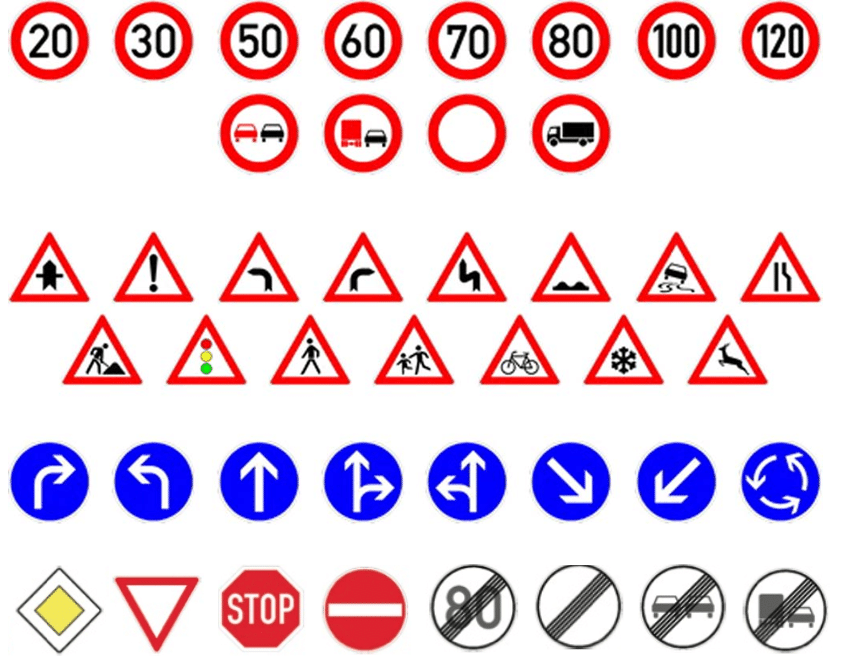

<h2 style="color:blue">1. Problem Definition</h2>

German Traffic Sign Recognition Dataset (GTSRB) is an image classification dataset.
The images are photos of traffic signs. The images are classified into 43 classes. The training set contains 39209 labeled images and the test set contains 12630 images. 

<h2 style="color:blue">2. Import Libraries and Dependencies</h2>

In [1]:
import os                                                  # use for read or write a file 
import cv2                                                 # use for Read Images
import numpy as np                                         # use for store data as numpy Array
import matplotlib.pyplot as plt                            # use for Visualize Data
import pandas as pd                                        # 
import tensorflow as tf                                    # use for Build Model
from tensorflow import keras                               # use for Build Model
from sklearn.model_selection import train_test_split       # use for Split Data into (x_train,y_train),(x_test, y_test)

<h2 style="color:blue">3. Data Collection</h2>

In [2]:
DATADIR = "Dataset"                                                                  # Define Dataset folder Path.

CATEGORIES = []                                                                      # Category list Initialization.
for i in range(43):
    CATEGORIES.append(str(i))                                                        # Append numbers from 0-43 to list.
    
IMG_SIZE=32                                                                          # Defince Image Size =32*32 (h*w).

def create_training_data():
    training_data = []                                                               # Train_Data list Initialization.
    for category in CATEGORIES:                                                      # do category [0,1,2,.....,43]. 
        path = os.path.join(DATADIR,category)                                        # create path to category Dataset\[0-43]
        class_num = CATEGORIES.index(category)                                       # get the classification  (0-43). 

        for img in os.listdir(path):                                                 # iterate over each image category[0-43].
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([img_array, class_num])              # add this to our training_data
                
            except Exception as e:                                        # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    return training_data

In [4]:
data=create_training_data()
print(len(data))

34799


<h2 style="color:blue">4. Data Preparation</h2>

In [5]:
import random
random.shuffle(data)

x=[]
y=[]

for img ,label in data:
    x.append(img)
    y.append(int(label))

x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [7]:
totla_data=len(x_train)+len(x_test)
train_data_ratio=len(x_train)/totla_data
test_data_ratio=len(x_test)/totla_data


print('number of train data :',len(x_train))
print('number of test data  :',len(x_test))
print('total  data number   :',totla_data)

print('train data ratio     :',train_data_ratio)
print('test  data ratio     :',test_data_ratio)
print('train data shape     :',x_train.shape)
print('test  data shape     :',x_test.shape)
print('train data shape     :',y_train.shape)
print('test  data shape     :',x_train.shape)
print('type  of train data  :',type(x_train))

number of train data : 27839
number of test data  : 6960
total  data number   : 34799
train data ratio     : 0.7999942527084112
test  data ratio     : 0.20000574729158885
train data shape     : (27839, 32, 32, 1)
test  data shape     : (6960, 32, 32, 1)
train data shape     : (27839,)
test  data shape     : (27839, 32, 32, 1)
type  of train data  : <class 'numpy.ndarray'>


In [8]:
df=pd.read_csv('labels.csv')
df.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


<h2 style="color:blue">5. Data Visualization </h2>

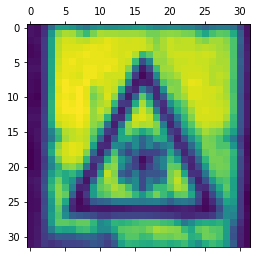

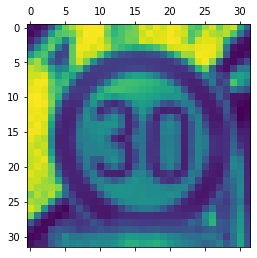

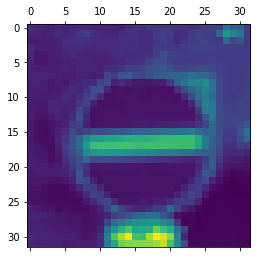

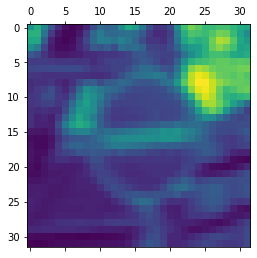

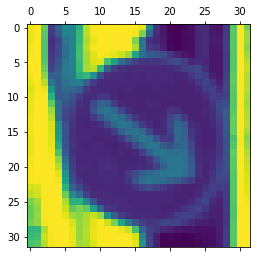

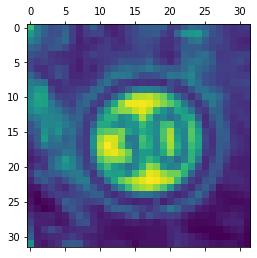

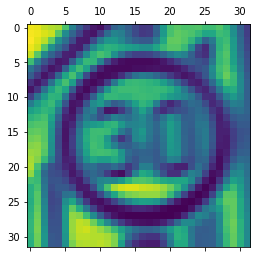

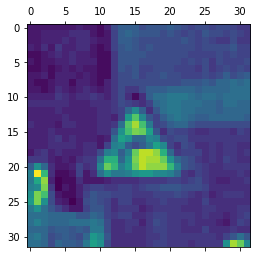

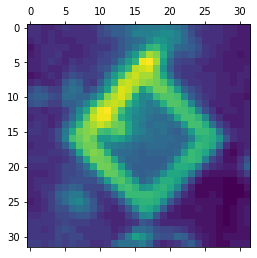

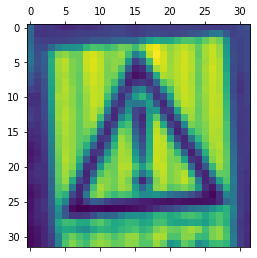

In [9]:
for i in range(10):
    plt.matshow(x_train[i])

In [10]:
output=[]
for i in range(10):
    output.append(df[df.ClassId==y_train[i]].Name)
df1=pd.DataFrame([output])
df1

,0,1,2,3,4,5,6,7,8,9
0,"30 Beware of ice/snow Name: Name, dtype: ob...","1 Speed limit (30km/h) Name: Name, dtype: o...","17 No entry Name: Name, dtype: object","17 No entry Name: Name, dtype: object","38 Keep right Name: Name, dtype: object","1 Speed limit (30km/h) Name: Name, dtype: o...","1 Speed limit (30km/h) Name: Name, dtype: o...","20 Dangerous curve to the right Name: Name,...","12 Priority road Name: Name, dtype: object","18 General caution Name: Name, dtype: object"


<h2 style="color:blue">6. ML & DL Modeling</h2>

In [11]:
from tensorflow.keras import datasets, layers, models

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(43, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(x_train, y_train, epochs=100)

Epoch 1/100
870/870 [==============================] - 9s 7ms/step - loss: 1.2866 - accuracy: 0.6860
Epoch 2/100
870/870 [==============================] - 7s 8ms/step - loss: 0.2320 - accuracy: 0.9393
Epoch 3/100
870/870 [==============================] - 7s 8ms/step - loss: 0.1295 - accuracy: 0.9650
Epoch 4/100
870/870 [==============================] - 6s 7ms/step - loss: 0.1066 - accuracy: 0.9733
Epoch 5/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0868 - accuracy: 0.9759
Epoch 6/100
870/870 [==============================] - 7s 8ms/step - loss: 0.0759 - accuracy: 0.9807
Epoch 7/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0741 - accuracy: 0.9809
Epoch 8/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0517 - accuracy: 0.9862
Epoch 9/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0596 - accuracy: 0.9844
Epoch 10/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0641 - accura

870/870 [==============================] - 6s 7ms/step - loss: 0.0436 - accuracy: 0.9967
Epoch 82/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0629 - accuracy: 0.9959
Epoch 83/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0774 - accuracy: 0.9956
Epoch 84/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0560 - accuracy: 0.9969
Epoch 85/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0621 - accuracy: 0.9968
Epoch 86/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0990 - accuracy: 0.9957
Epoch 87/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0709 - accuracy: 0.9966
Epoch 88/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0805 - accuracy: 0.9959
Epoch 89/100
870/870 [==============================] - 6s 7ms/step - loss: 0.0701 - accuracy: 0.9966
Epoch 90/100
870/870 [==============================] - 6s 7ms/step - loss: 0.1149 - accuracy: 

<h2 style="color:blue">7. Evaluate & Test Model</h2>

In [15]:
cnn.evaluate(x_test,y_test)

218/218 [==============================] - 1s 4ms/step - loss: 0.6353 - accuracy: 0.9872


[0.6353416442871094, 0.9872126579284668]

In [70]:
result=np.array([np.argmax(y) for y in cnn.predict(x_test)])

In [71]:
from sklearn.metrics import confusion_matrix , classification_report

In [72]:
cm=confusion_matrix(y_test,result)
cm

array([[ 41,   3,   0, ...,   0,   0,   0],
       [  0, 413,   0, ...,   0,   0,   0],
       [  0,   1, 390, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  42,   0,   0],
       [  0,   0,   0, ...,   0,  36,   0],
       [  0,   0,   0, ...,   0,   0,  39]], dtype=int64)

In [73]:
result

array([13, 29, 13, ...,  7, 18, 25], dtype=int64)

<AxesSubplot:>

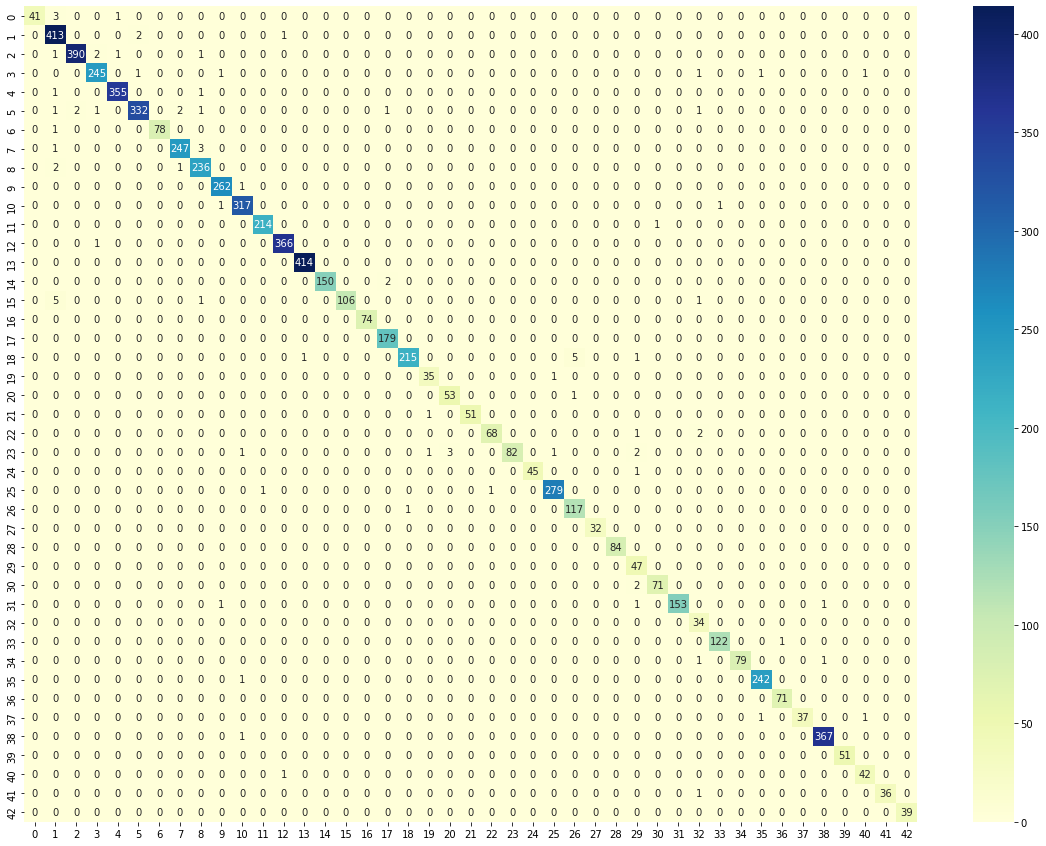

In [74]:
import seaborn as sn

plt.figure(figsize=(20,15))
sn.heatmap(cm,annot=True ,fmt='d',cmap="YlGnBu")

In [75]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.96      0.99      0.98       416
           2       0.99      0.99      0.99       395
           3       0.98      0.98      0.98       250
           4       0.99      0.99      0.99       357
           5       0.99      0.97      0.98       341
           6       1.00      0.99      0.99        79
           7       0.99      0.98      0.99       251
           8       0.97      0.99      0.98       239
           9       0.99      1.00      0.99       263
          10       0.99      0.99      0.99       319
          11       1.00      1.00      1.00       215
          12       0.99      1.00      1.00       367
          13       1.00      1.00      1.00       414
          14       1.00      0.99      0.99       152
          15       1.00      0.94      0.97       113
          16       1.00      1.00      1.00        74
          17       0.98    

In [55]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

<h2 style="color:blue">8. Predict New Test Data</h2>

In [81]:
yp=np.array([np.argmax(y) for y in cnn.predict(x_test)])
yt=y_test

In [84]:
yp[:10]

array([13, 29, 13, 13, 13, 38, 23,  4,  2, 25], dtype=int64)

In [85]:
yt[:10]

array([13, 29, 13, 13, 13, 38, 23,  4,  2, 25])